In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Load Data
path="/content/drive/MyDrive/Assignment/"
transactions_df = pd.read_csv(path+'Transactions.csv')
products_df = pd.read_csv(path+'Products.csv')
customers_df = pd.read_csv(path+'Customers.csv')

# Exploratory Data Analysis (EDA) and Business Insights

In [4]:
# Data Preparation
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

In [5]:
# Merge datasets
sales_data = pd.merge(transactions_df, products_df, on='ProductID')
full_data = pd.merge(sales_data, customers_df, on='CustomerID')

In [9]:
# 1. Regional Analysis
regional_sales = full_data.groupby('Region').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'CustomerID': pd.Series.nunique
}).round(2)
regional_sales.columns = ['Total Orders', 'Total Revenue', 'Unique Customers']
regional_sales['Average Order Value'] = (regional_sales['Total Revenue'] / regional_sales['Total Orders']).round(2)
regional_sales

,Total Orders,Total Revenue,Unique Customers,Average Order Value
Region,,,,
Asia,218,152074.97,44,697.59
Europe,234,166254.63,50,710.49
North America,244,152313.40,46,624.24
South America,304,219352.56,59,721.55


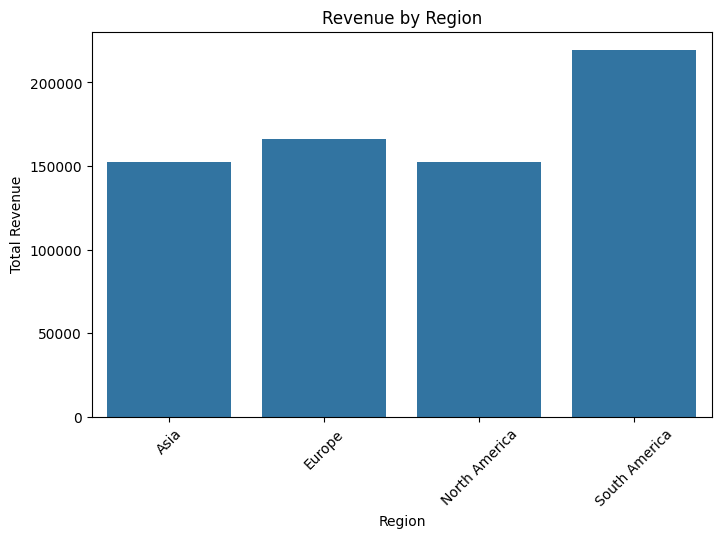

In [11]:
# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=regional_sales.reset_index(), x='Region', y='Total Revenue')
plt.title('Revenue by Region')
plt.xticks(rotation=45)
plt.show()

In [13]:
# 2. Product Category Analysis
category_performance = full_data.groupby('Category').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).round(2)
category_performance['Average Item Price'] = (category_performance['TotalValue'] / category_performance['Quantity']).round(2)
category_performance

,TransactionID,TotalValue,Quantity,Average Item Price
Category,,,,
Books,270,192147.47,681,282.15
Clothing,228,166170.66,590,281.65
Electronics,254,180783.50,627,288.33
Home Decor,248,150893.93,639,236.14


In [16]:
# 3. Customer Purchase Patterns
customer_metrics = full_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'TransactionDate': lambda x: (x.max() - x.min()).days
})
customer_metrics.columns = ['Purchase Frequency', 'Total Spend', 'Customer Lifetime']
customer_metrics['Average Order Value'] = (customer_metrics['Total Spend'] / customer_metrics['Purchase Frequency']).round(2)
customer_metrics

,Purchase Frequency,Total Spend,Customer Lifetime,Average Order Value
CustomerID,,,,
C0001,5,3354.52,288,670.90
C0002,4,1862.74,278,465.68
C0003,4,2725.38,188,681.34
C0004,8,5354.88,299,669.36
C0005,3,2034.24,233,678.08
...,...,...,...,...
C0196,4,4982.88,130,1245.72
C0197,3,1928.65,349,642.88
C0198,2,931.83,5,465.92


In [17]:
# 4. Time-based Analysis
monthly_sales = full_data.groupby(full_data['TransactionDate'].dt.to_period('M')).agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()
monthly_sales['TransactionDate'] = monthly_sales['TransactionDate'].astype(str)
monthly_sales

,TransactionDate,TotalValue,TransactionID
0,2023-12,3769.52,4
1,2024-01,66376.39,107
2,2024-02,51459.27,77
3,2024-03,47828.73,80
4,2024-04,57519.06,86
5,2024-05,64527.74,86
6,2024-06,48771.18,69
7,2024-07,71366.39,96
8,2024-08,63436.74,94
9,2024-09,70603.75,96


In [18]:
# 5. Top Products Analysis
top_products = full_data.groupby(['ProductName', 'Category']).agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).round(2)
top_products = top_products.sort_values('TotalValue', ascending=False).head(10)

In [20]:
# Key Business Insights
print("\nKey Business Insights:")
print("1. Regional Performance:", regional_sales['Total Revenue'].idxmax(),
      "generates highest revenue of $", regional_sales['Total Revenue'].max())
print("2. Top Category:", category_performance['TotalValue'].idxmax(),
      "with $", category_performance['TotalValue'].max())
print("3. Average Order Value: $", full_data['TotalValue'].mean().round(2))
print("4. Best Selling Product:", top_products.index[0][0])
print("5. Customer Lifetime Value: $", customer_metrics['Total Spend'].mean().round(2))


Key Business Insights:
1. Regional Performance: South America generates highest revenue of $ 219352.56
2. Top Category: Books with $ 192147.47
3. Average Order Value: $ 690.0
4. Best Selling Product: ActiveWear Smartwatch
5. Customer Lifetime Value: $ 3467.31
